<a href="https://colab.research.google.com/github/narunaer/Internal-acoustic-resonances-small-scattering-center-compared-with-the-wavelength/blob/main/Internal_acoustic_resonances_air_tube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!apt-get update
!apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_legendre, lpmv, spherical_jn, spherical_yn
from scipy import integrate
from scipy.integrate import quad
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from scipy.special import eval_legendre
from scipy.misc import derivative
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
from scipy.signal import find_peaks
from matplotlib.ticker import LogLocator, LogFormatter
import matplotlib.ticker as ticker
import scipy.special as sp


dpi= 300
px = 1e0/dpi

plt.rcParams.update({
    "text.usetex"   : False,
    "figure.dpi"    : dpi,
    #"text.latex.preamble" : r"\usepackage{lmodern}",
    "font.family" : "sans-serif",
#    "figure.figsize": (800*px,600*px)
})
plt.rcParams['text.usetex'] = True

B = 1
f = 1
c1 = 343e0
c0 = 1522e0


rho1 = 1.205
rho0 = 1024e0

m = c0 / c1

k0 = 2*np.pi*f/c0
k1 = 2*np.pi*f/c1
x0_max = 10
a = 0.1e0
x0_range = np.arange(0,0.2,1e-5)
q= 2*f/(c1*rho1*B**2)
mt = (rho0/rho1)*m
w = 2*np.pi*f

In [ ]:
J = lambda n, x: sp.jn(abs(n), x) * ((-1e0) ** n)  # Corrects for negative n using (-1)^n
H = lambda n, x: sp.jn(abs(n), x) + 1e0j * sp.yn(abs(n), x)  # For Hankel functions, no need to treat negative n separately
dJ = lambda n, x: sp.jvp(abs(n), x) * ((-1e0) ** n)  # Derivative for J
dH = lambda n, x: sp.jvp(abs(n), x) + 1e0j * sp.yvp(abs(n), x)  # Derivative for H

def b_l(l, m, mt, x0, x1):
    J = lambda n, x: sp.jn(abs(n), x) * ((-1e0) ** n)  # Corrects for negative n using (-1)^n
    H = lambda n, x: sp.jn(abs(n), x) + 1e0j * sp.yn(abs(n), x)  # For Hankel functions, no need to treat negative n separately
    dJ = lambda n, x: sp.jvp(abs(n), x) * ((-1e0) ** n)  # Derivative for J
    dH = lambda n, x: sp.jvp(abs(n), x) + 1e0j * sp.yvp(abs(n), x)  # Derivative for H

    tmp = (mt * dJ(l, x1) * H(l, x0)- J(l, x1) * dH(l, x0) )

    if tmp == 0:
        raise ValueError("Denominator in the calculation of bl is zero, which will cause a division by zero error.")

    bl = (dJ(l, x0) * H(l, x0) - J(l, x0) * dH(l, x0)) * (mt / m) / tmp

    return bl

def I_1(l, x1):
    integrand = lambda x: x*J(l-1, x)*J(l+1, x)
    result, _ = quad(integrand, 0, x1)
    return  result


def I_wp(l, x1):
    integrand = lambda x: x*(J(l, x)**2)
    result, _ = quad(integrand, 0, x1)
    return  result

def I_wk1(l, x1):
    integrand = lambda x: (J(l, x)**2)/x
    result, _ = quad(integrand, 0, x1)
    return  result
def I_wk2(l, x1):
    integrand = lambda x: (dJ(l, x)**2)*x
    result, _ = quad(integrand, 0, x1)
    return  result
def ell_max(x0):
    return 3 + x0 + 4.05 * x0**(1/3)

<ipython-input-6-86e27933ac16>:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 0, x1)


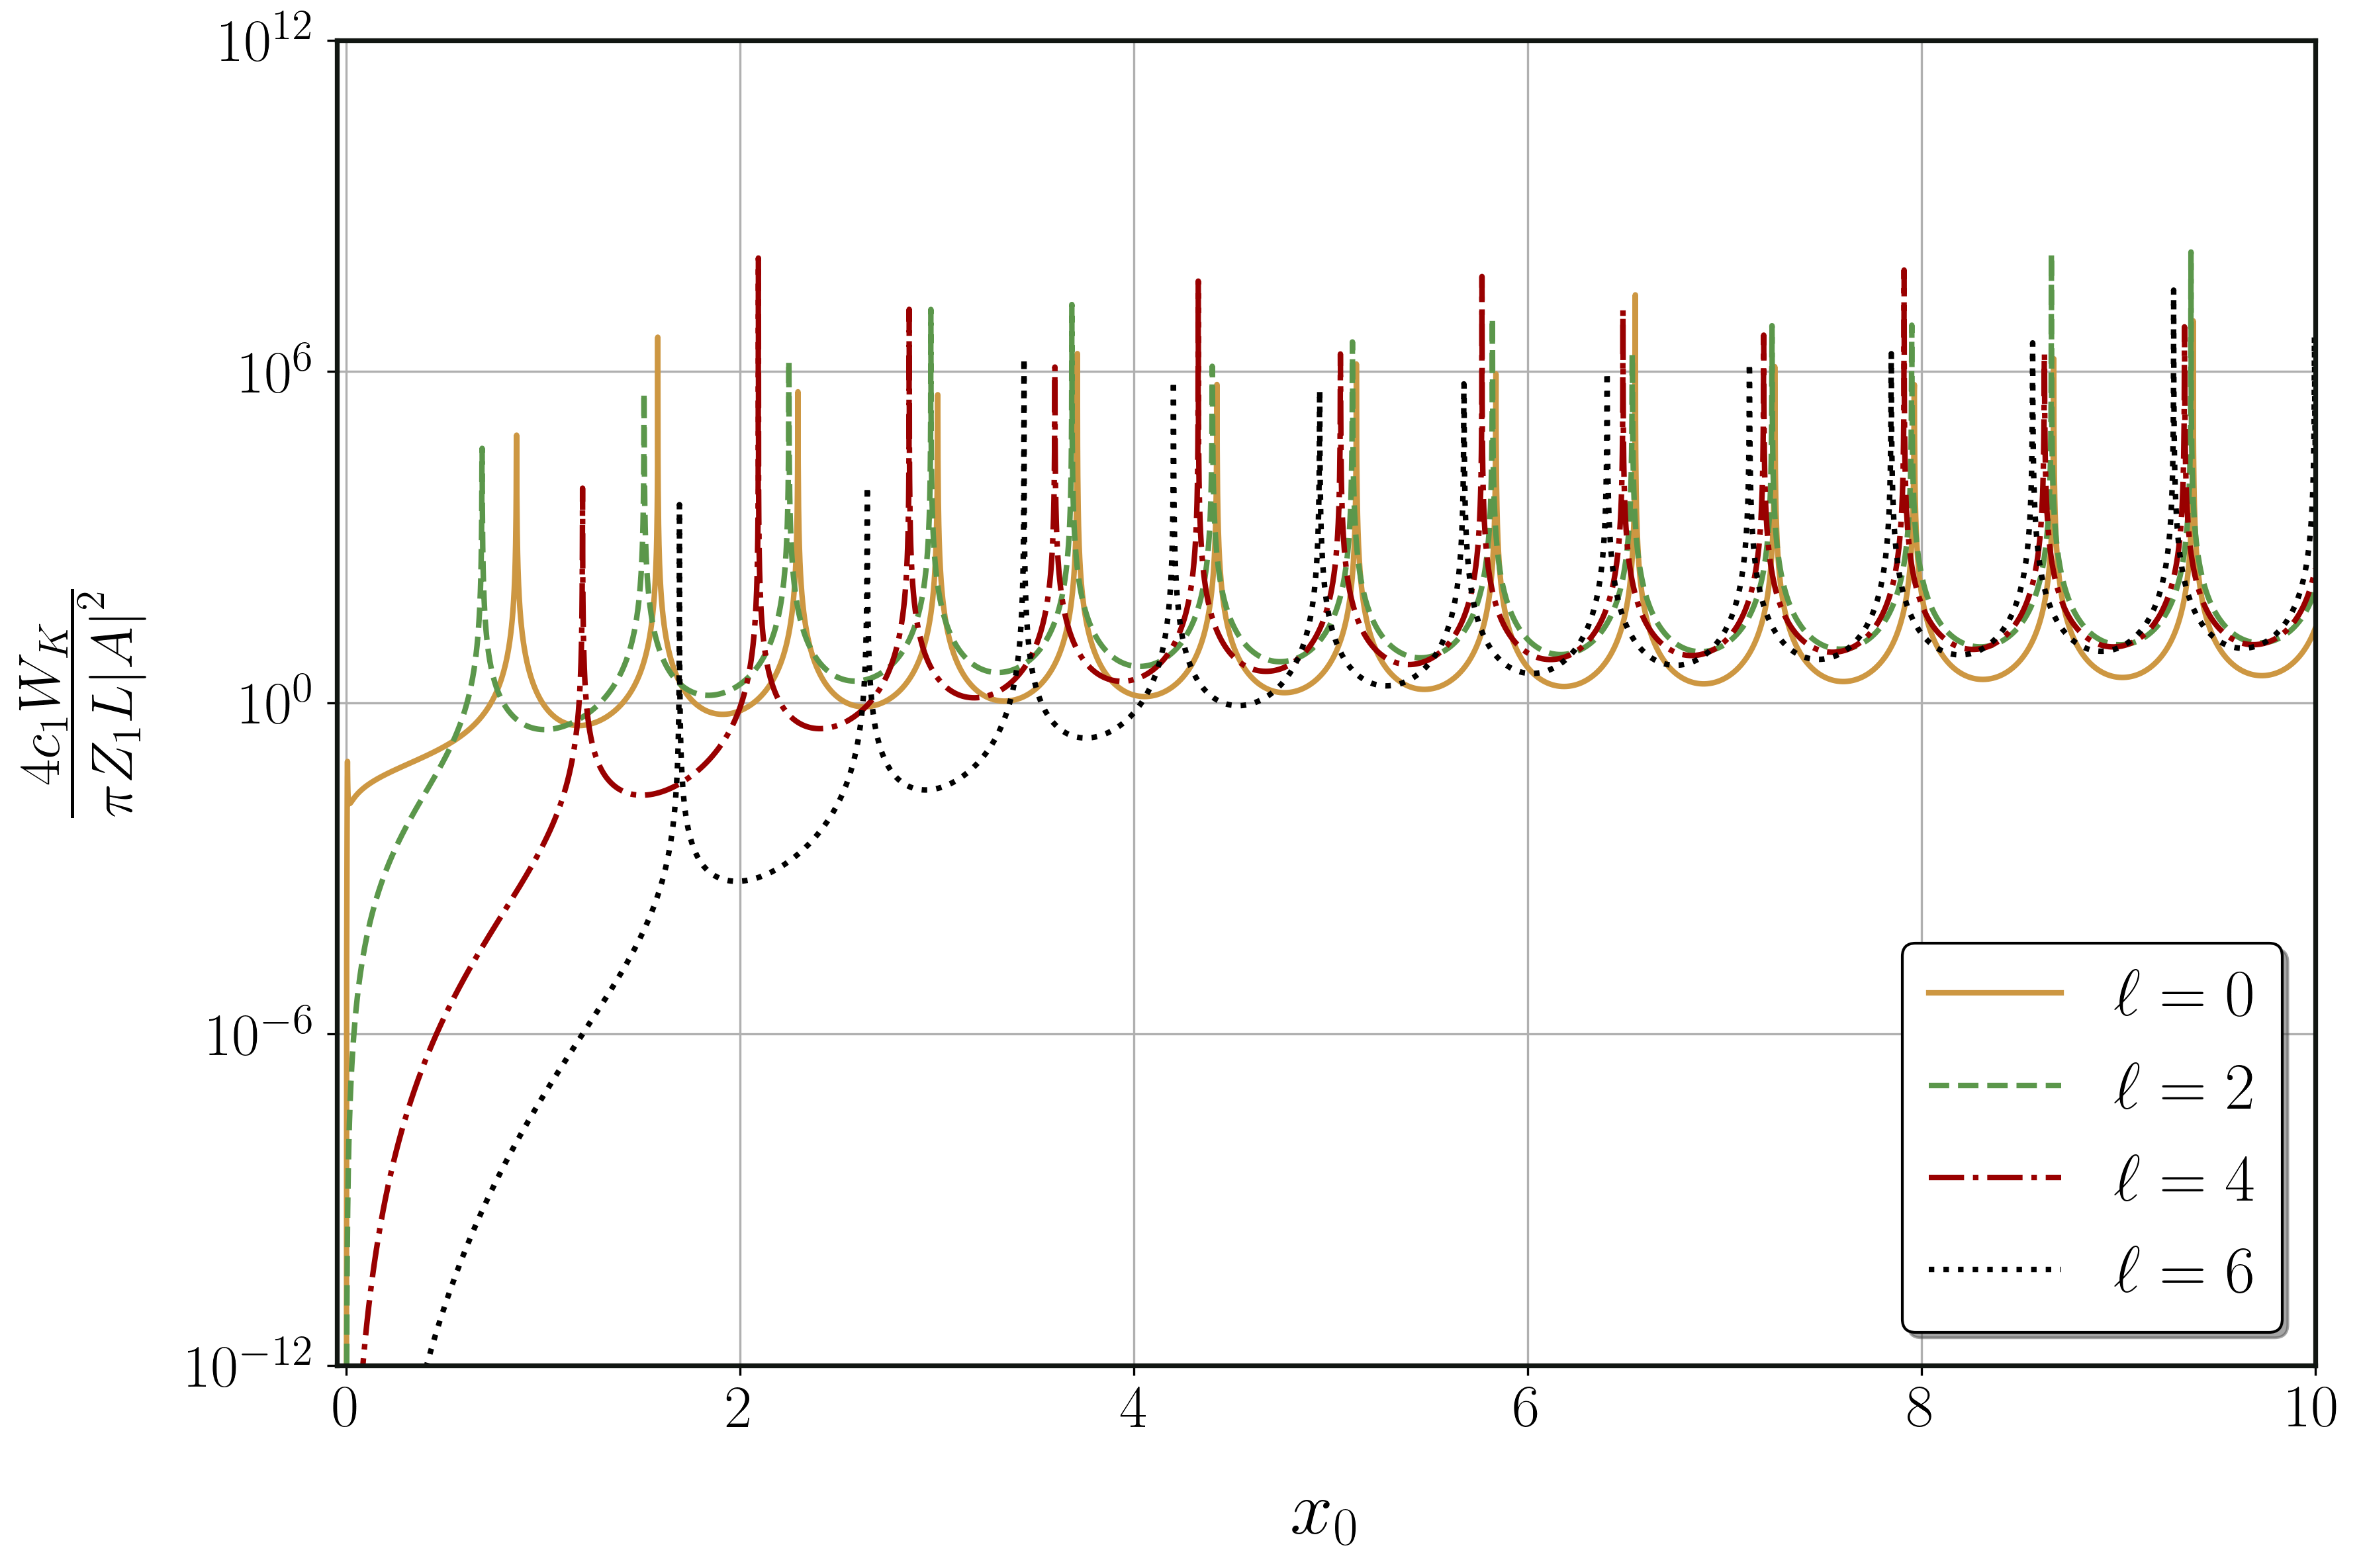

In [ ]:
x0_range_oe = np.arange(1e-5, 10, 1e-3)
even_l_values = [l for l in range(0, 8) if l % 2 == 0]
colors_even = ['#cd9742', '#5b974b', '#990000', 'black']
linestyles_even = ['-', '--', '-.', ':', '-.', '--']
odd_l_values = [l for l in range(1, 9) if l % 2 != 0]
colors_odd = ['#cd9742', '#5b974b', '#990000', 'black']
linestyles_odd = ['-', '--', '-.', ':', '-']
linewidth = 2

# Create a new figure for even l values
plt.figure(figsize=(12, 8))

# Plot for even l values
for idx, l in enumerate(even_l_values):
    kinetic_energy = []
    for x0 in x0_range_oe:
        x1 = m * x0
        b_l_value = np.abs(b_l(l, m, mt, x0, x1))**2

        # Step 1: Define epsilon based on l
        if l == 0:
            epsilon_l = 1
        else:
            epsilon_l = 2
        I_wk1_value = I_wk1(l, x1)
        I_wk2_value = I_wk2(l , x1)
        term1 = (l**2)* I_wk1_value # Integral part
        term2 = I_wk2_value  # l term with Bessel functions
        # Step 4: Combine the terms into the full kinetic energy expression
        kinetic_sum_series = (b_l_value*(epsilon_l**2) ) * (term1 + term2)
        # Step 5: Append the result to the kinetic_energy list
        kinetic_energy.append(kinetic_sum_series)

    label = r'$\ell = ' + f'{l}' + r'$'
    plt.plot(x0_range_oe, kinetic_energy, color=colors_even[idx], linestyle=linestyles_even[idx], linewidth=linewidth, label=label)

# Customize plot
plt.yscale('log')
plt.xlabel('$x_0$', fontsize=28, labelpad=15)
plt.ylabel(r'$\frac{4 c_1   W_K}{\pi Z_1 L\left|A \right|^2}$', fontsize=30, labelpad=15)

# Customize y-ticks spacing and format
plt.gca().yaxis.set_major_locator(ticker.LogLocator(numticks=4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.0e}'))
plt.tick_params(axis='x', which='major', labelsize=22)
plt.tick_params(axis='y', which='major', labelsize=22)
# Add legend and grid
plt.legend(fontsize=24, framealpha=1, edgecolor='black', shadow=True, fancybox=True, loc='lower right')
plt.grid(True)

# Customize axes appearance
for spine in ['bottom', 'left', 'top', 'right']:
    plt.gca().spines[spine].set_color('#111612')
    plt.gca().spines[spine].set_linewidth(1.75)

# Set limits for x and y axes
plt.xlim([-0.05, 10])
plt.ylim([1e-12, 1e12])

# Adjust layout and save the plot
plt.tight_layout()

# Save files
plt.savefig('/content/drive/My Drive/wk_even_01_cylinder.pdf', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wk_even_01_cylinder.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wk_even_01_cylinder.eps', dpi=600, bbox_inches='tight', pad_inches=0.1)

# Show the plot inline
plt.show()

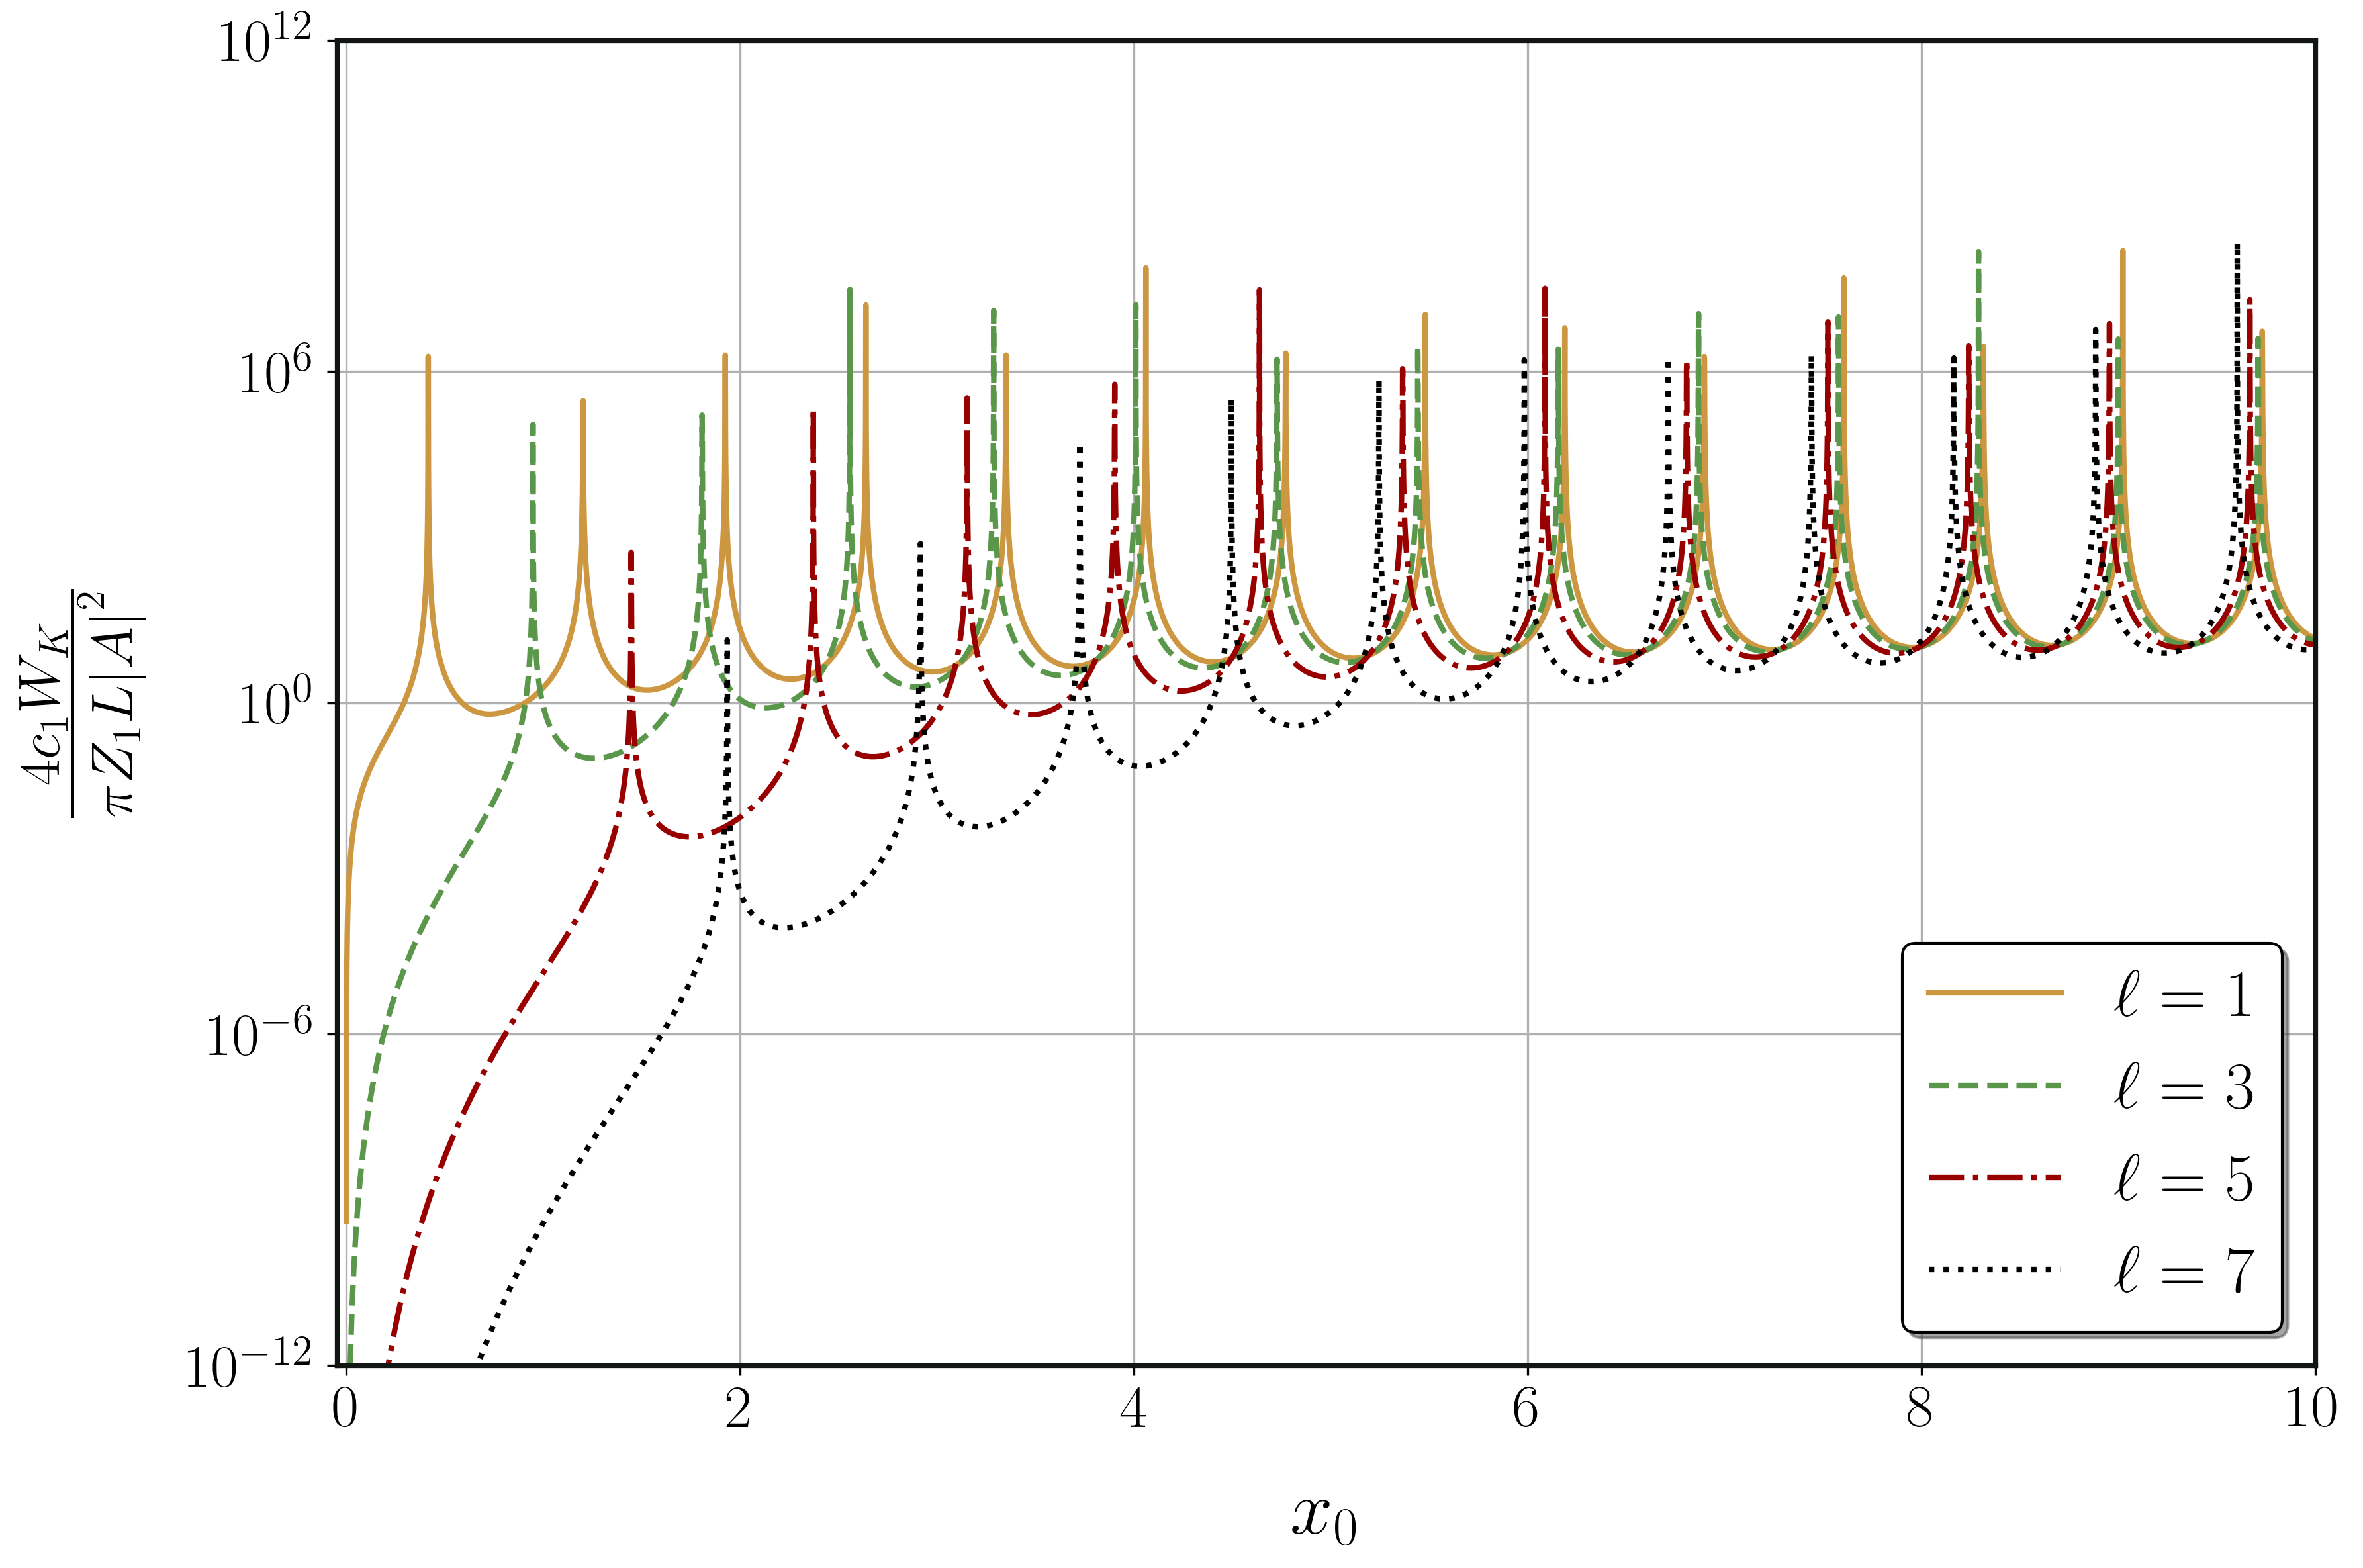

In [ ]:
x0_range_oe = np.arange(1e-5, 10, 1e-3)
even_l_values = [l for l in range(0, 8) if l % 2 == 0]
colors_even = ['#cd9742', '#5b974b', '#990000', 'black']
linestyles_even = ['-', '--', '-.', ':', '-.', '--']
odd_l_values = [l for l in range(1, 9) if l % 2 != 0]
colors_odd = ['#cd9742', '#5b974b', '#990000', 'black']
linestyles_odd = ['-', '--', '-.', ':', '-']
linewidth = 2

# Create a new figure for even l values
plt.figure(figsize=(12, 8))

# Plot for even l values
for idx, l in enumerate(odd_l_values):
    kinetic_energy = []
    for x0 in x0_range_oe:
        x1 = m * x0
        b_l_value = np.abs(b_l(l, m, mt, x0, x1))**2

        # Step 1: Define epsilon based on l
        if l == 0:
            epsilon_l = 1
        else:
            epsilon_l = 2
        I_wk1_value = I_wk1(l, x1)
        I_wk2_value = I_wk2(l , x1)
        term1 = (l**2)* I_wk1_value # Integral part
        term2 = I_wk2_value  # l term with Bessel functions
        # Step 4: Combine the terms into the full kinetic energy expression
        kinetic_sum_series = (b_l_value*(epsilon_l**2) ) * (term1 + term2)
        # Step 5: Append the result to the kinetic_energy list
        kinetic_energy.append(kinetic_sum_series)

    label = r'$\ell = ' + f'{l}' + r'$'
    plt.plot(x0_range_oe, kinetic_energy, color=colors_even[idx], linestyle=linestyles_even[idx], linewidth=linewidth, label=label)

# Customize plot
plt.yscale('log')
plt.xlabel('$x_0$', fontsize=28, labelpad=15)
plt.ylabel(r'$\frac{4 c_1   W_K}{\pi Z_1 L\left|A \right|^2}$', fontsize=30, labelpad=15)

# Customize y-ticks spacing and format
plt.gca().yaxis.set_major_locator(ticker.LogLocator(numticks=4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.0e}'))
plt.tick_params(axis='x', which='major', labelsize=22)
plt.tick_params(axis='y', which='major', labelsize=22)
# Add legend and grid
plt.legend(fontsize=24, framealpha=1, edgecolor='black', shadow=True, fancybox=True, loc='lower right')
plt.grid(True)

# Customize axes appearance
for spine in ['bottom', 'left', 'top', 'right']:
    plt.gca().spines[spine].set_color('#111612')
    plt.gca().spines[spine].set_linewidth(1.75)

# Set limits for x and y axes
plt.xlim([-0.05, 10])
plt.ylim([1e-12, 1e12])

# Adjust layout and save the plot
plt.tight_layout()

# Save files
plt.savefig('/content/drive/My Drive/wk_odd_01_cylinder.pdf', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wk_odd_01_cylinder.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wk_odd_01_cylinder.eps', dpi=600, bbox_inches='tight', pad_inches=0.1)

# Show the plot inline
plt.show()

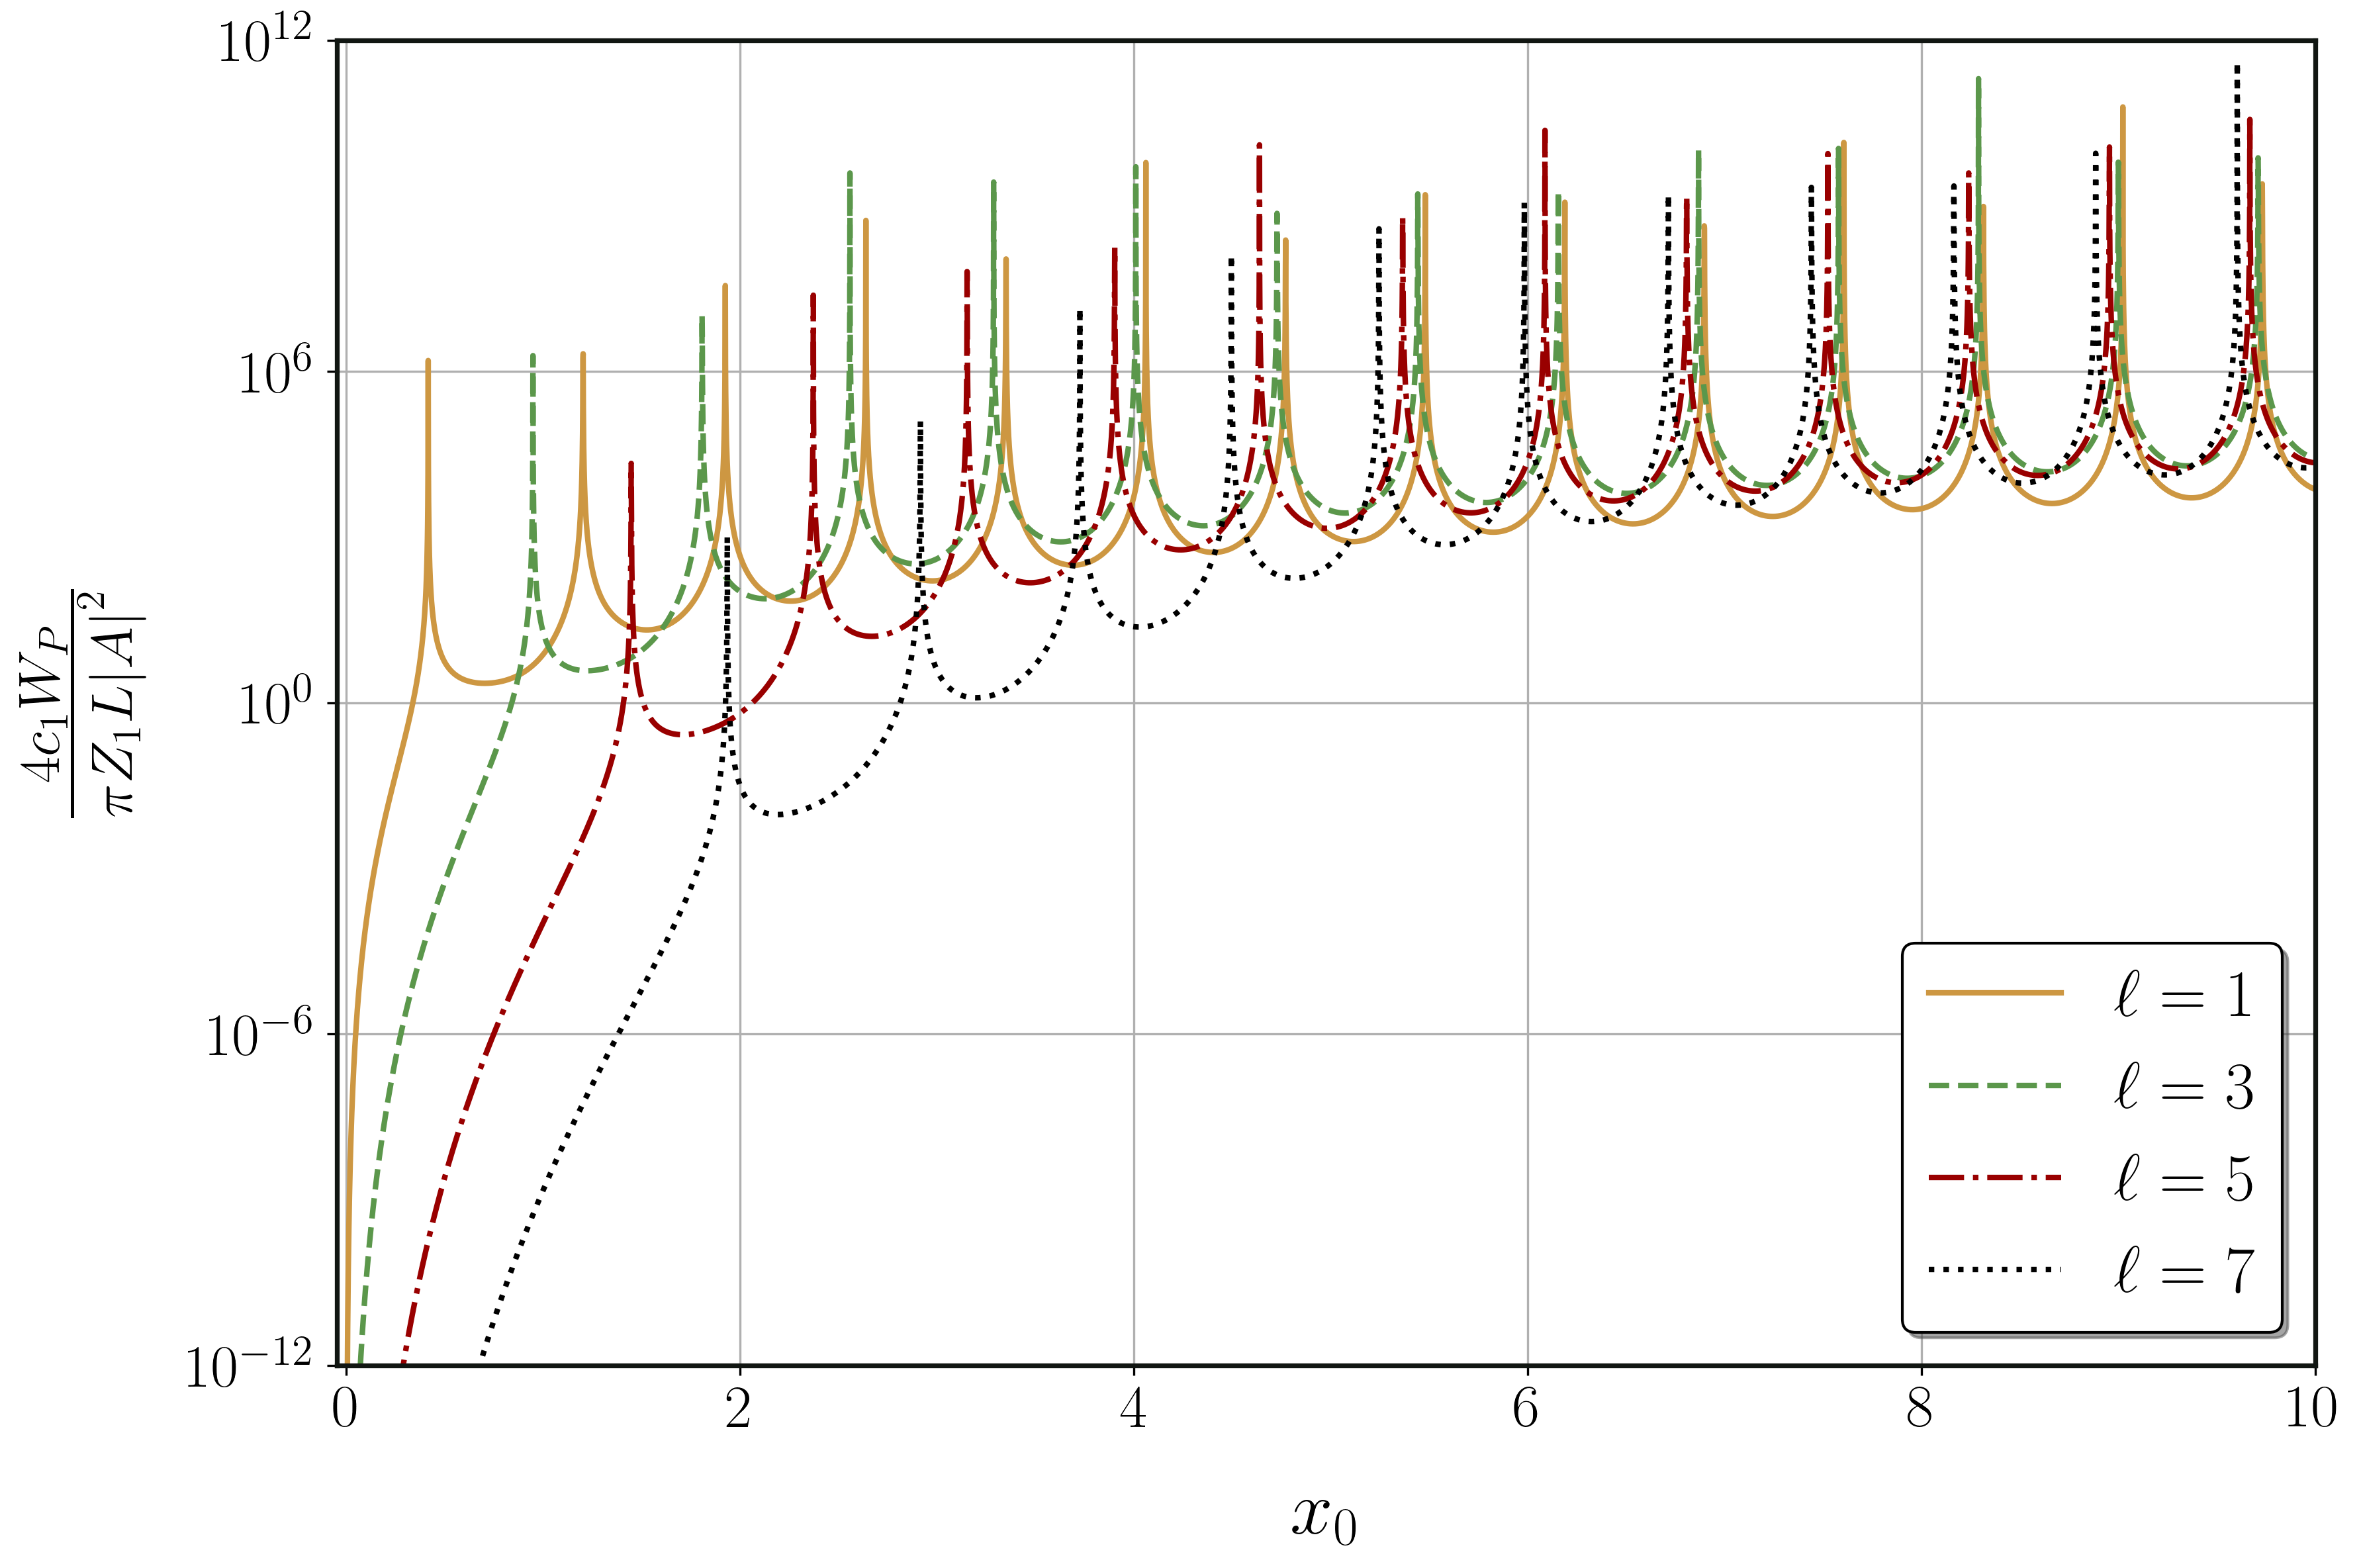

In [ ]:
plt.figure(figsize=(12, 8))
# Plot for even l values
potential_energy_data_even = []
for idx, l in enumerate(odd_l_values):
    potential_energy = []
    for x0 in x0_range_oe:
        x1 = m * x0
        b_l_value = np.abs(b_l(l, m, mt, x0, x1)) ** 2
        epsilon_l = 1 if l == 1 else 4
        potential_sum_series = (x1**2) *epsilon_l* b_l_value * I_wp(l, x1)

        potential_energy.append(potential_sum_series)

    label = r'$\ell = ' + f'{l}' + r'$'
    plt.plot(x0_range_oe, potential_energy, color=colors_even[idx], linestyle=linestyles_even[idx], linewidth=linewidth, label=label)

plt.yscale('log')
plt.xlabel('$x_0$', fontsize=28, labelpad=15)
plt.ylabel(r'$\frac{4 c_1   W_P}{\pi Z_1 L\left|A \right|^2}$', fontsize=30, labelpad=15)

# Customize y-ticks spacing and format
plt.gca().yaxis.set_major_locator(ticker.LogLocator(numticks=4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.0e}'))
plt.tick_params(axis='x', which='major', labelsize=22)
plt.tick_params(axis='y', which='major', labelsize=22)
# Add legend and grid
plt.legend(fontsize=24, framealpha=1, edgecolor='black', shadow=True, fancybox=True, loc='lower right')
plt.grid(True)

# Customize axes appearance
for spine in ['bottom', 'left', 'top', 'right']:
    plt.gca().spines[spine].set_color('#111612')
    plt.gca().spines[spine].set_linewidth(1.75)

plt.xlim([-0.05, 10])
plt.ylim([1e-12, 1e12])

# Save the even l values plot
plt.tight_layout()
plt.savefig('/content/drive/My Drive/wp_odd_01_cylinder.pdf', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wp_odd_01_cylinder.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wp_odd_01_cylinder.eps', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

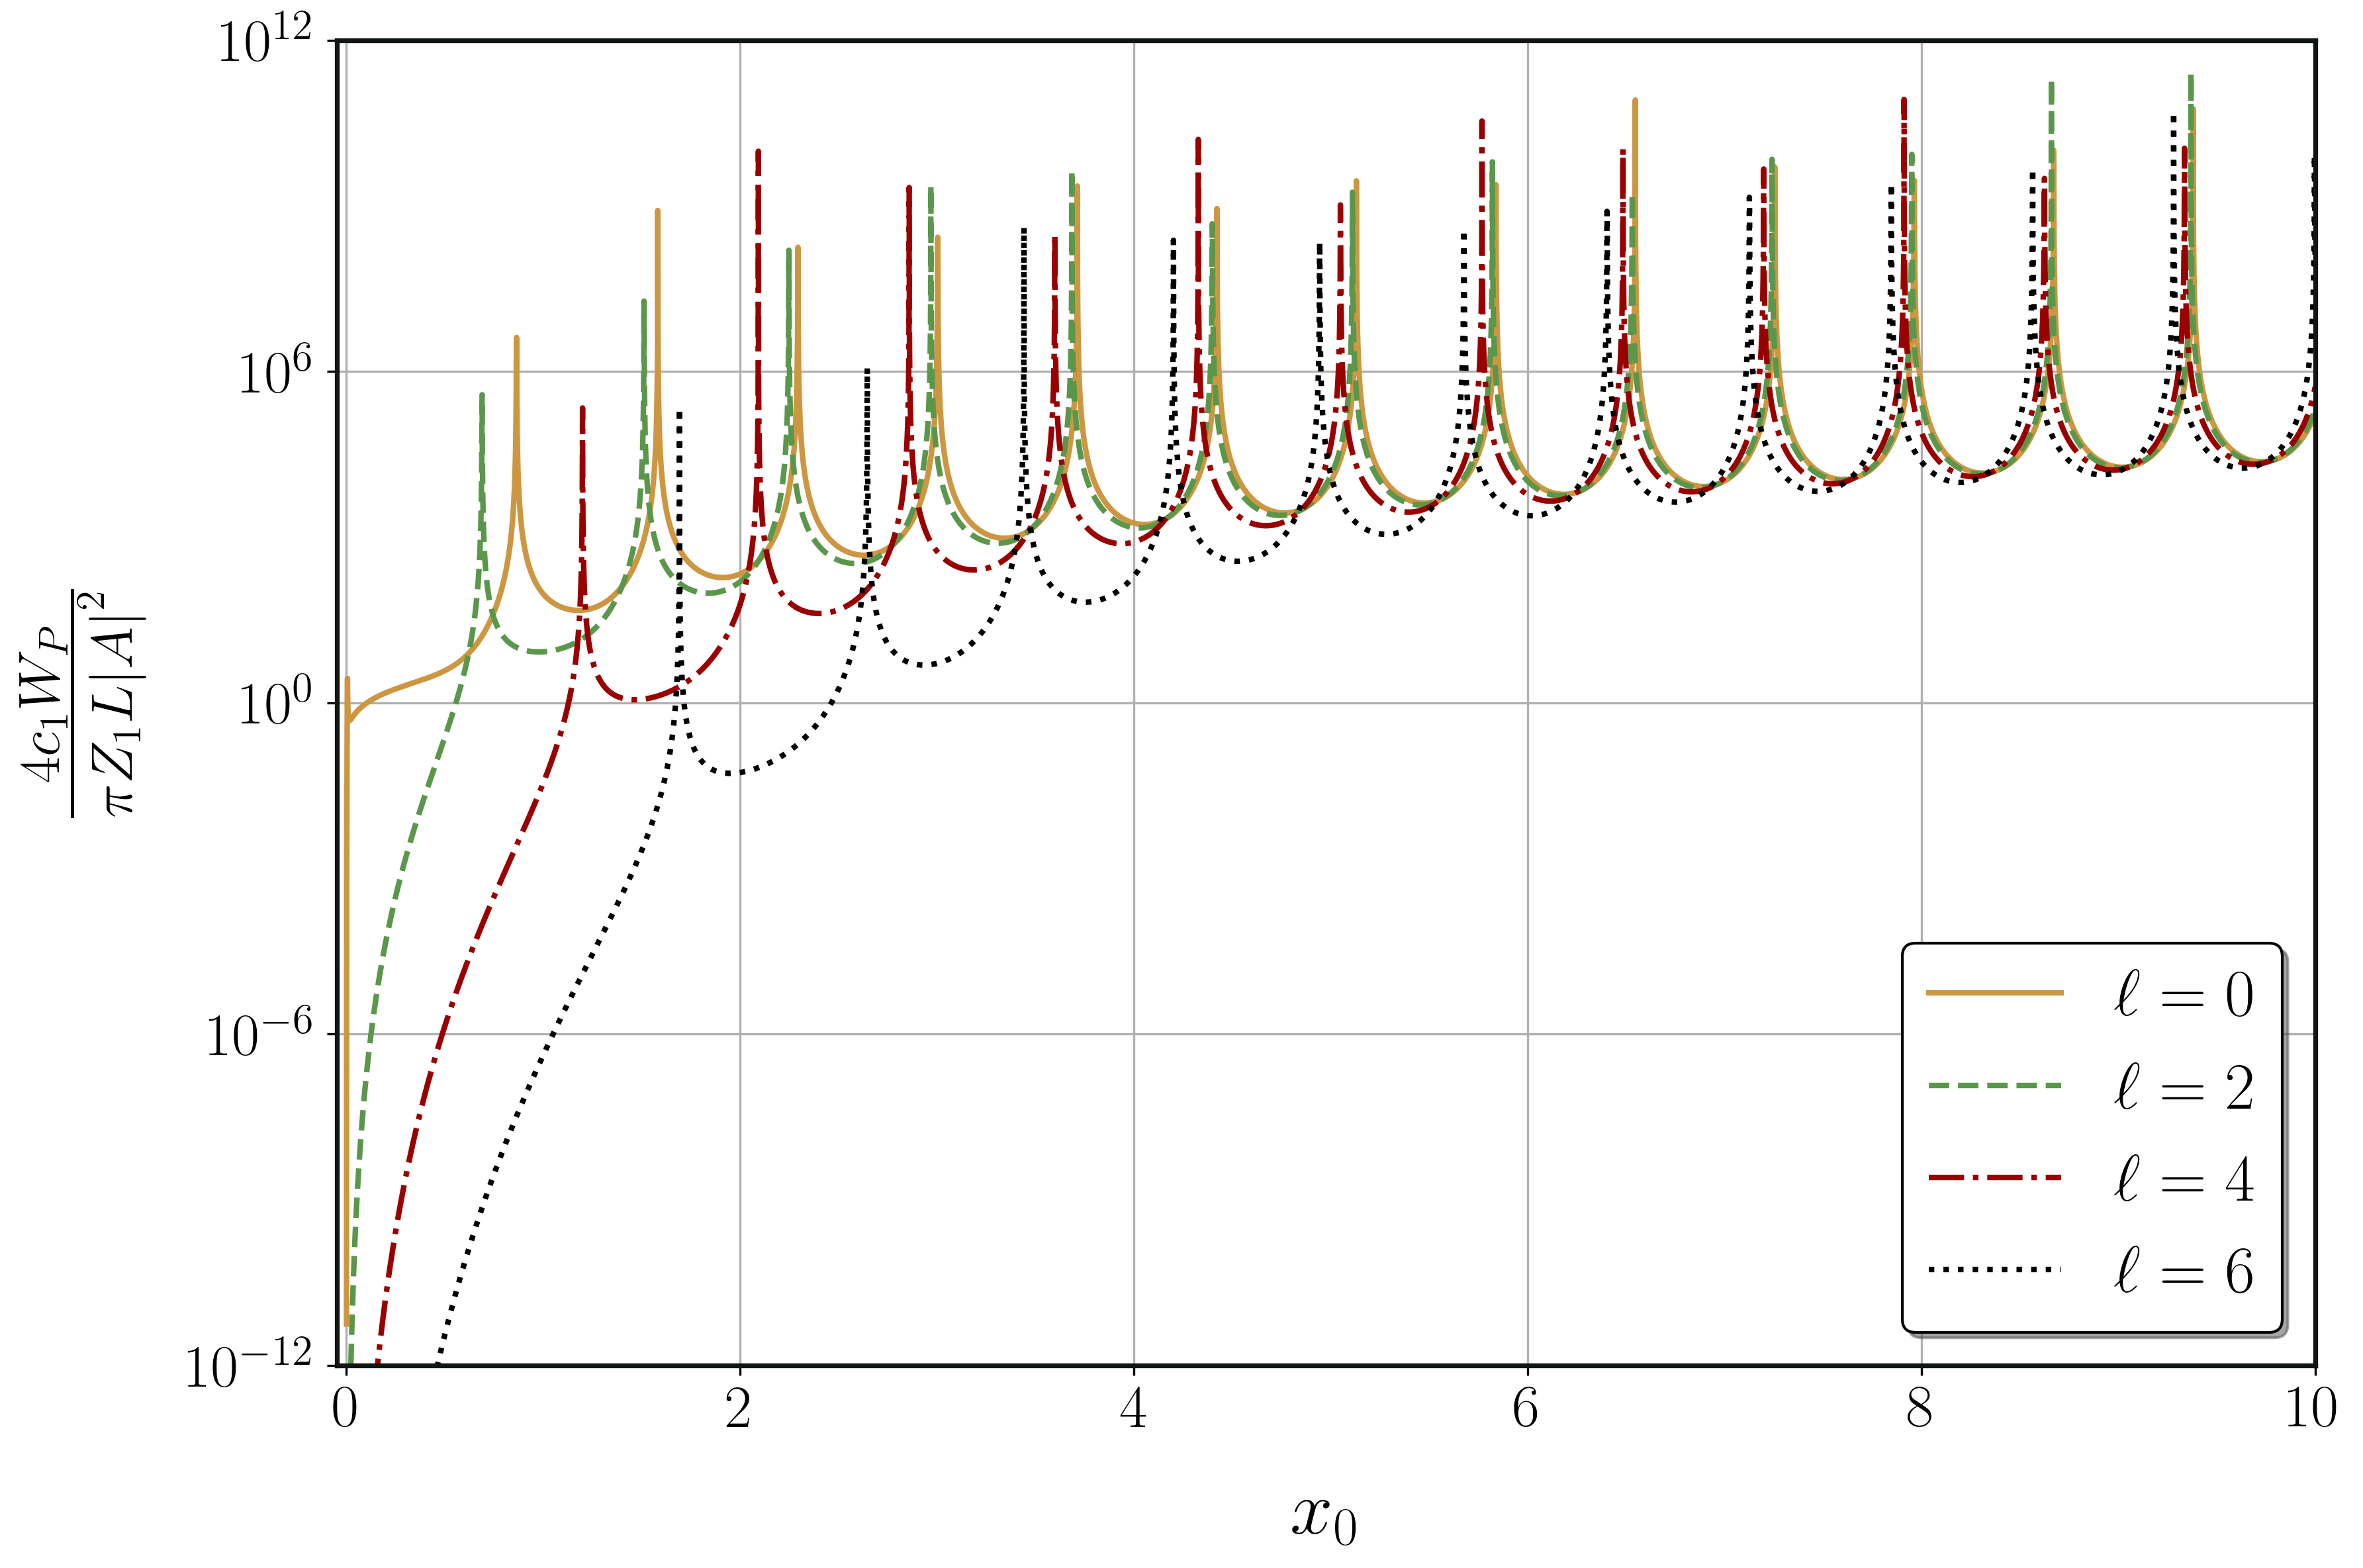

In [ ]:
plt.figure(figsize=(12, 8))
# Plot for even l values
potential_energy_data_even = []
for idx, l in enumerate(even_l_values):
    potential_energy = []
    for x0 in x0_range_oe:
        x1 = m * x0
        b_l_value = np.abs(b_l(l, m, mt, x0, x1)) ** 2
        epsilon_l = 1 if l == 1 else 4
        potential_sum_series = (x1**2) *epsilon_l* b_l_value * I_wp(l, x1)

        potential_energy.append(potential_sum_series)

    label = r'$\ell = ' + f'{l}' + r'$'
    plt.plot(x0_range_oe, potential_energy, color=colors_even[idx], linestyle=linestyles_even[idx], linewidth=linewidth, label=label)

plt.yscale('log')
plt.xlabel('$x_0$', fontsize=28, labelpad=15)
plt.ylabel(r'$\frac{4 c_1   W_P}{\pi Z_1 L\left|A \right|^2}$', fontsize=30, labelpad=15)

# Customize y-ticks spacing and format
plt.gca().yaxis.set_major_locator(ticker.LogLocator(numticks=4))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.0e}'))
plt.tick_params(axis='x', which='major', labelsize=22)
plt.tick_params(axis='y', which='major', labelsize=22)
# Add legend and grid
plt.legend(fontsize=24, framealpha=1, edgecolor='black', shadow=True, fancybox=True, loc='lower right')
plt.grid(True)

# Customize axes appearance
for spine in ['bottom', 'left', 'top', 'right']:
    plt.gca().spines[spine].set_color('#111612')
    plt.gca().spines[spine].set_linewidth(1.75)

plt.xlim([-0.05, 10])
plt.ylim([1e-12, 1e12])

# Save the even l values plot
plt.tight_layout()
plt.savefig('/content/drive/My Drive/wp_even_01_cylinder.pdf', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wp_even_01_cylinder.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wp_even_01_cylinder.eps', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
kinetic_energy = []
potential_energy = []

x0_range = np.arange(1e-5, 0.2, 1e-5)

for x0 in x0_range:
    l_max = int(ell_max(x0))  # Corrected x0_max to x0
    kinetic_sum_series = 0
    potential_sum_series = 0
    for l in range(0, l_max):
        x1 = m * x0
        b_l_value = np.abs(b_l(l, m, mt, x0, x1))**2
        epsilon_l = 1 if l == 1 else 4

        # Potential energy term
        potential_sum_series += (x1**2) * b_l_value *epsilon_l* (J(l, x1)**2 - J(l - 1, x1) * J(l + 1, x1))

        # Kinetic energy terms
        I_wk1_value = I_wk1(l, x1)
        I_wk2_value = I_wk2(l, x1)
        term1 = (l**2) * I_wk1_value
        term2 = I_wk2_value
        kinetic_sum_series += b_l_value * (epsilon_l**2) * (term1 + term2)

    # Append the results after summing over all l
    potential_energy.append(potential_sum_series)
    kinetic_energy.append(kinetic_sum_series)

# Convert lists to arrays
kinetic_energy = np.array(kinetic_energy)
potential_energy = np.array(potential_energy)

kinetic_energy_low_precision = []
potential_energy_low_precision = []

x0_range_low_precision = np.arange(1e-5, 10, 1e-3)

for x0 in x0_range_low_precision:
    l_max = 14  # Corrected x0_max to x0
    kinetic_sum_series_low_precision = 0
    potential_sum_series_low_precision = 0
    for l in range(0, l_max):
        x1 = m * x0
        b_l_value = np.abs(b_l(l, m, mt, x0, x1))**2
        epsilon_l = 1 if l == 0 else 4

        # Potential energy term
        potential_sum_series_low_precision +=(x1**2) * b_l_value *epsilon_l* (J(l, x1)**2 - J(l - 1, x1) * J(l + 1, x1))

        # Kinetic energy terms
        I_wk1_value = I_wk1(l, x1)
        I_wk2_value = I_wk2(l, x1)
        term1 = (l**2) * I_wk1_value
        term2 = I_wk2_value
        kinetic_sum_series_low_precision += b_l_value * (epsilon_l**2) * (term1 + term2)

    # Append the results after summing over all l
    potential_energy_low_precision.append(potential_sum_series_low_precision)
    kinetic_energy_low_precision.append(kinetic_sum_series_low_precision)

# Convert lists to arrays
kinetic_energy_low_precision = np.array(kinetic_energy_low_precision)
potential_energy_low_precision = np.array(potential_energy_low_precision)

<ipython-input-6-86e27933ac16>:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 0, x1)


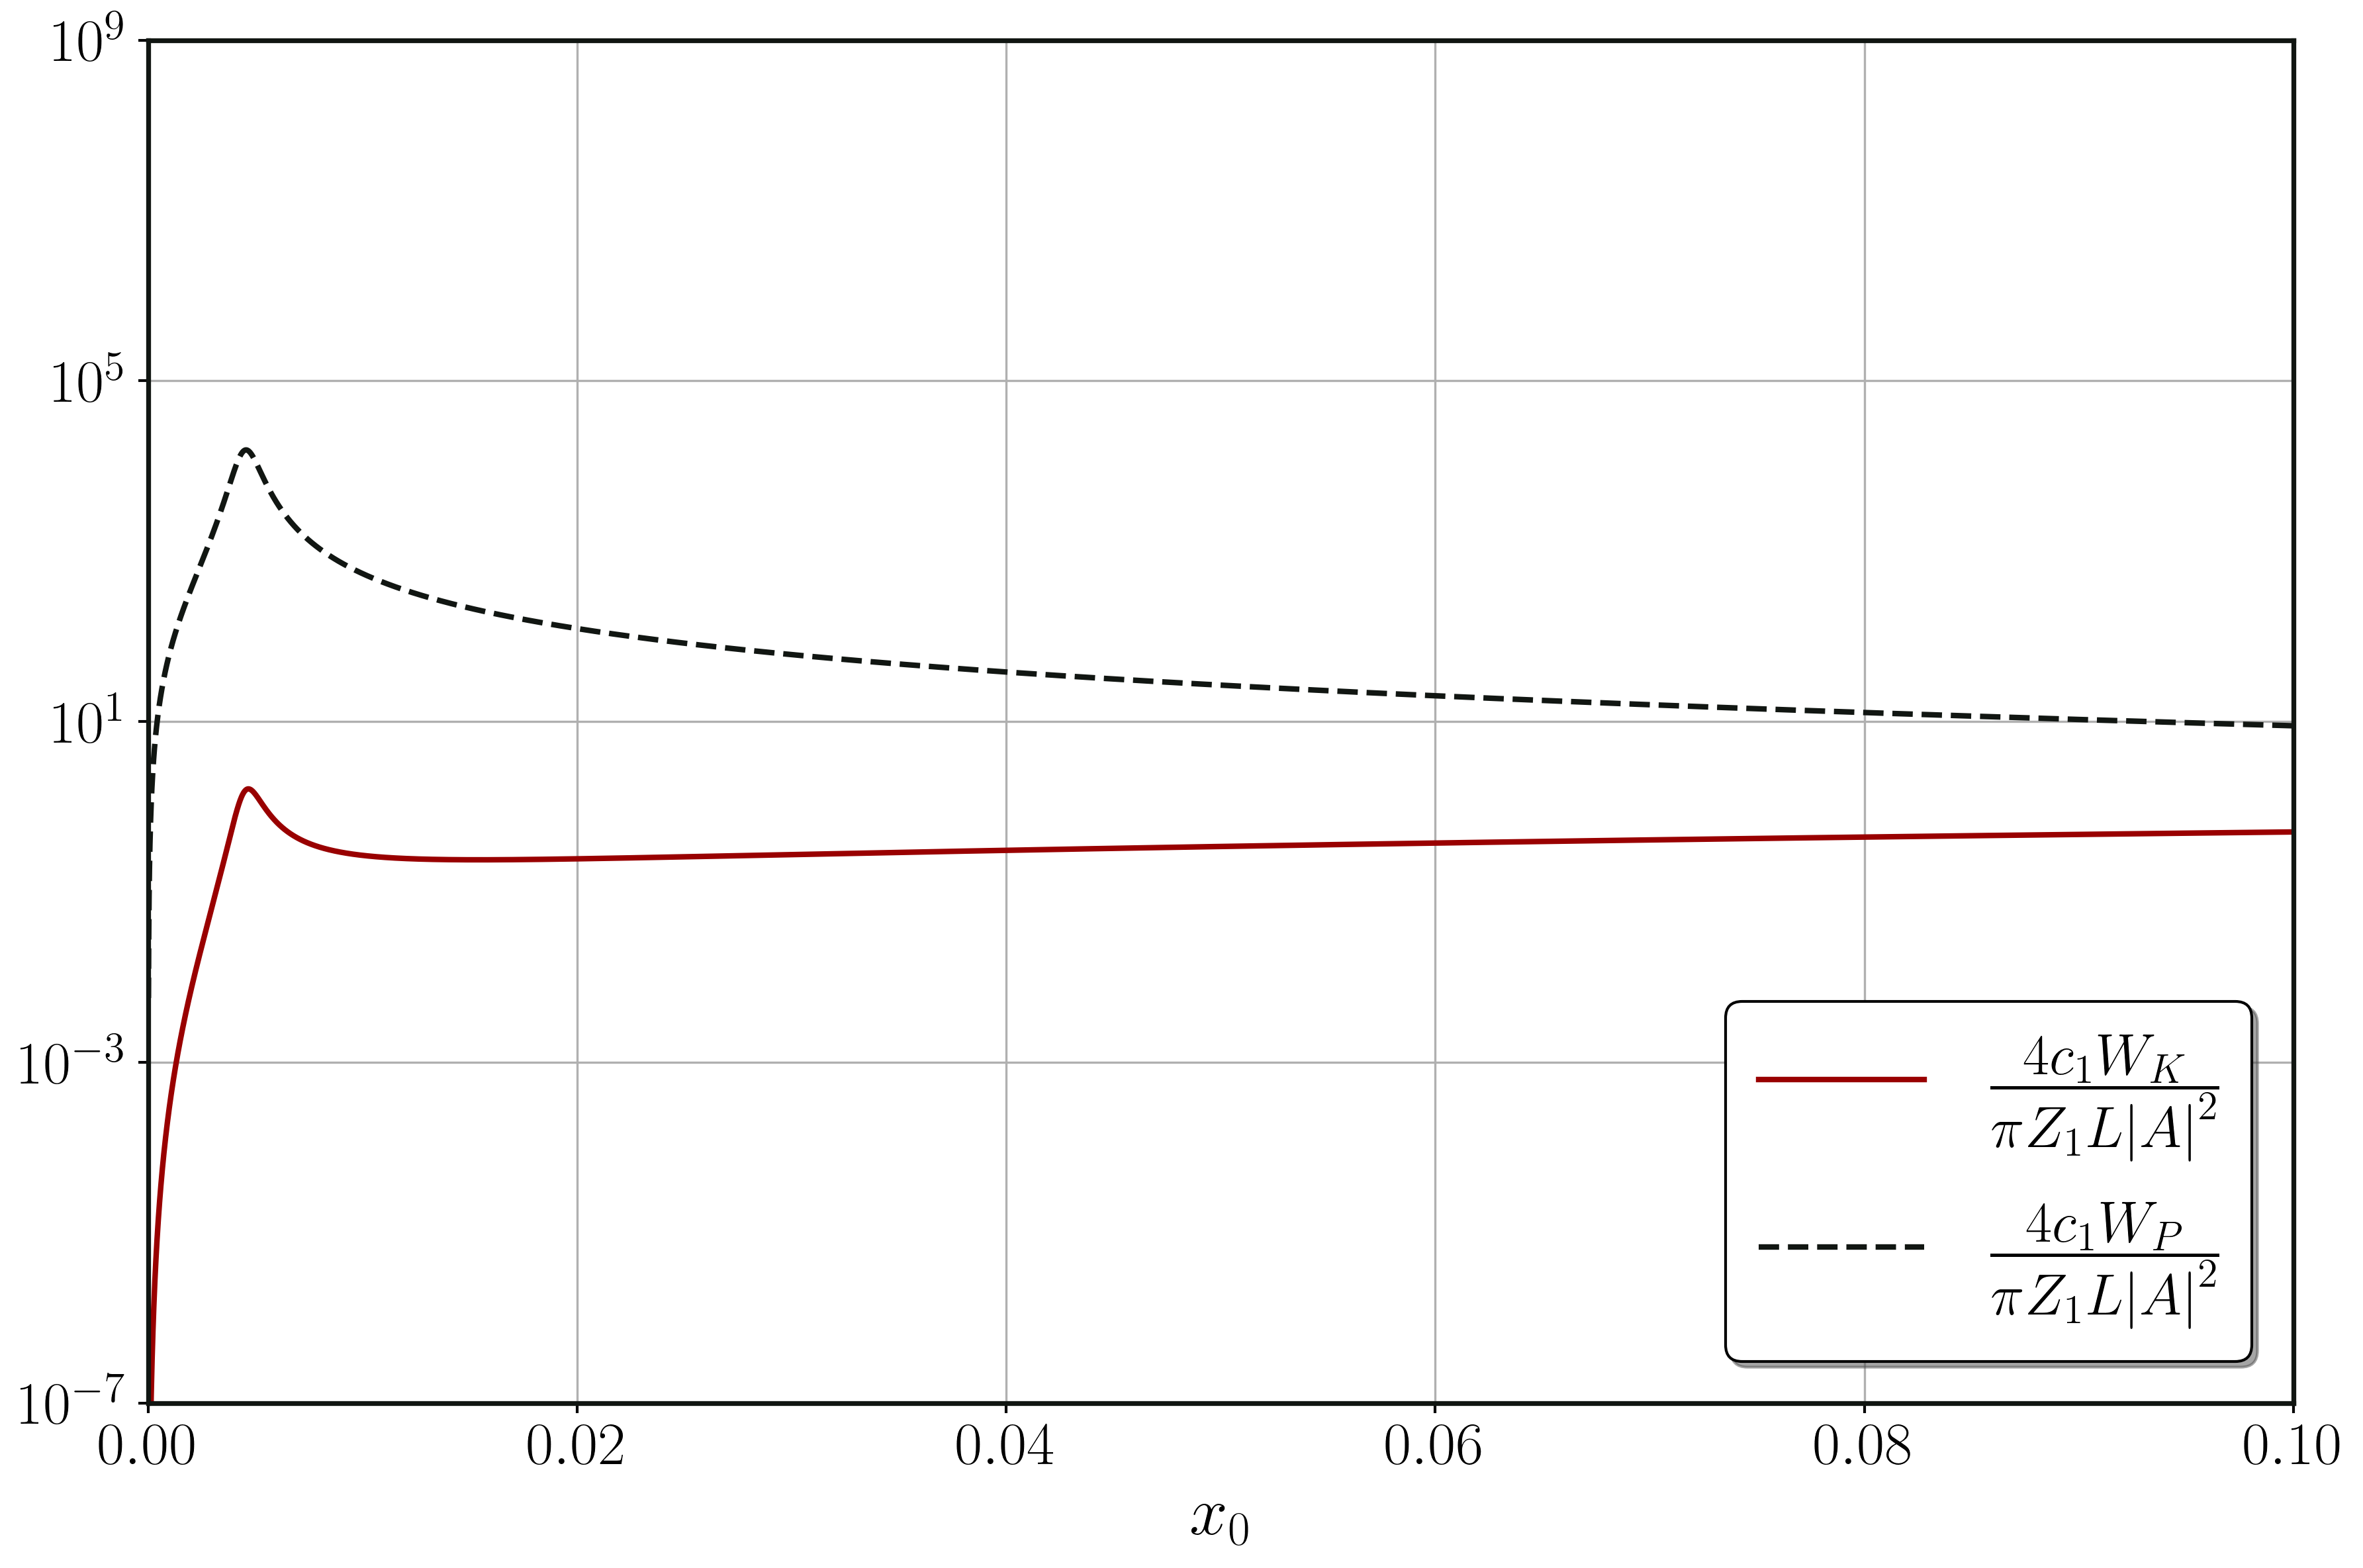

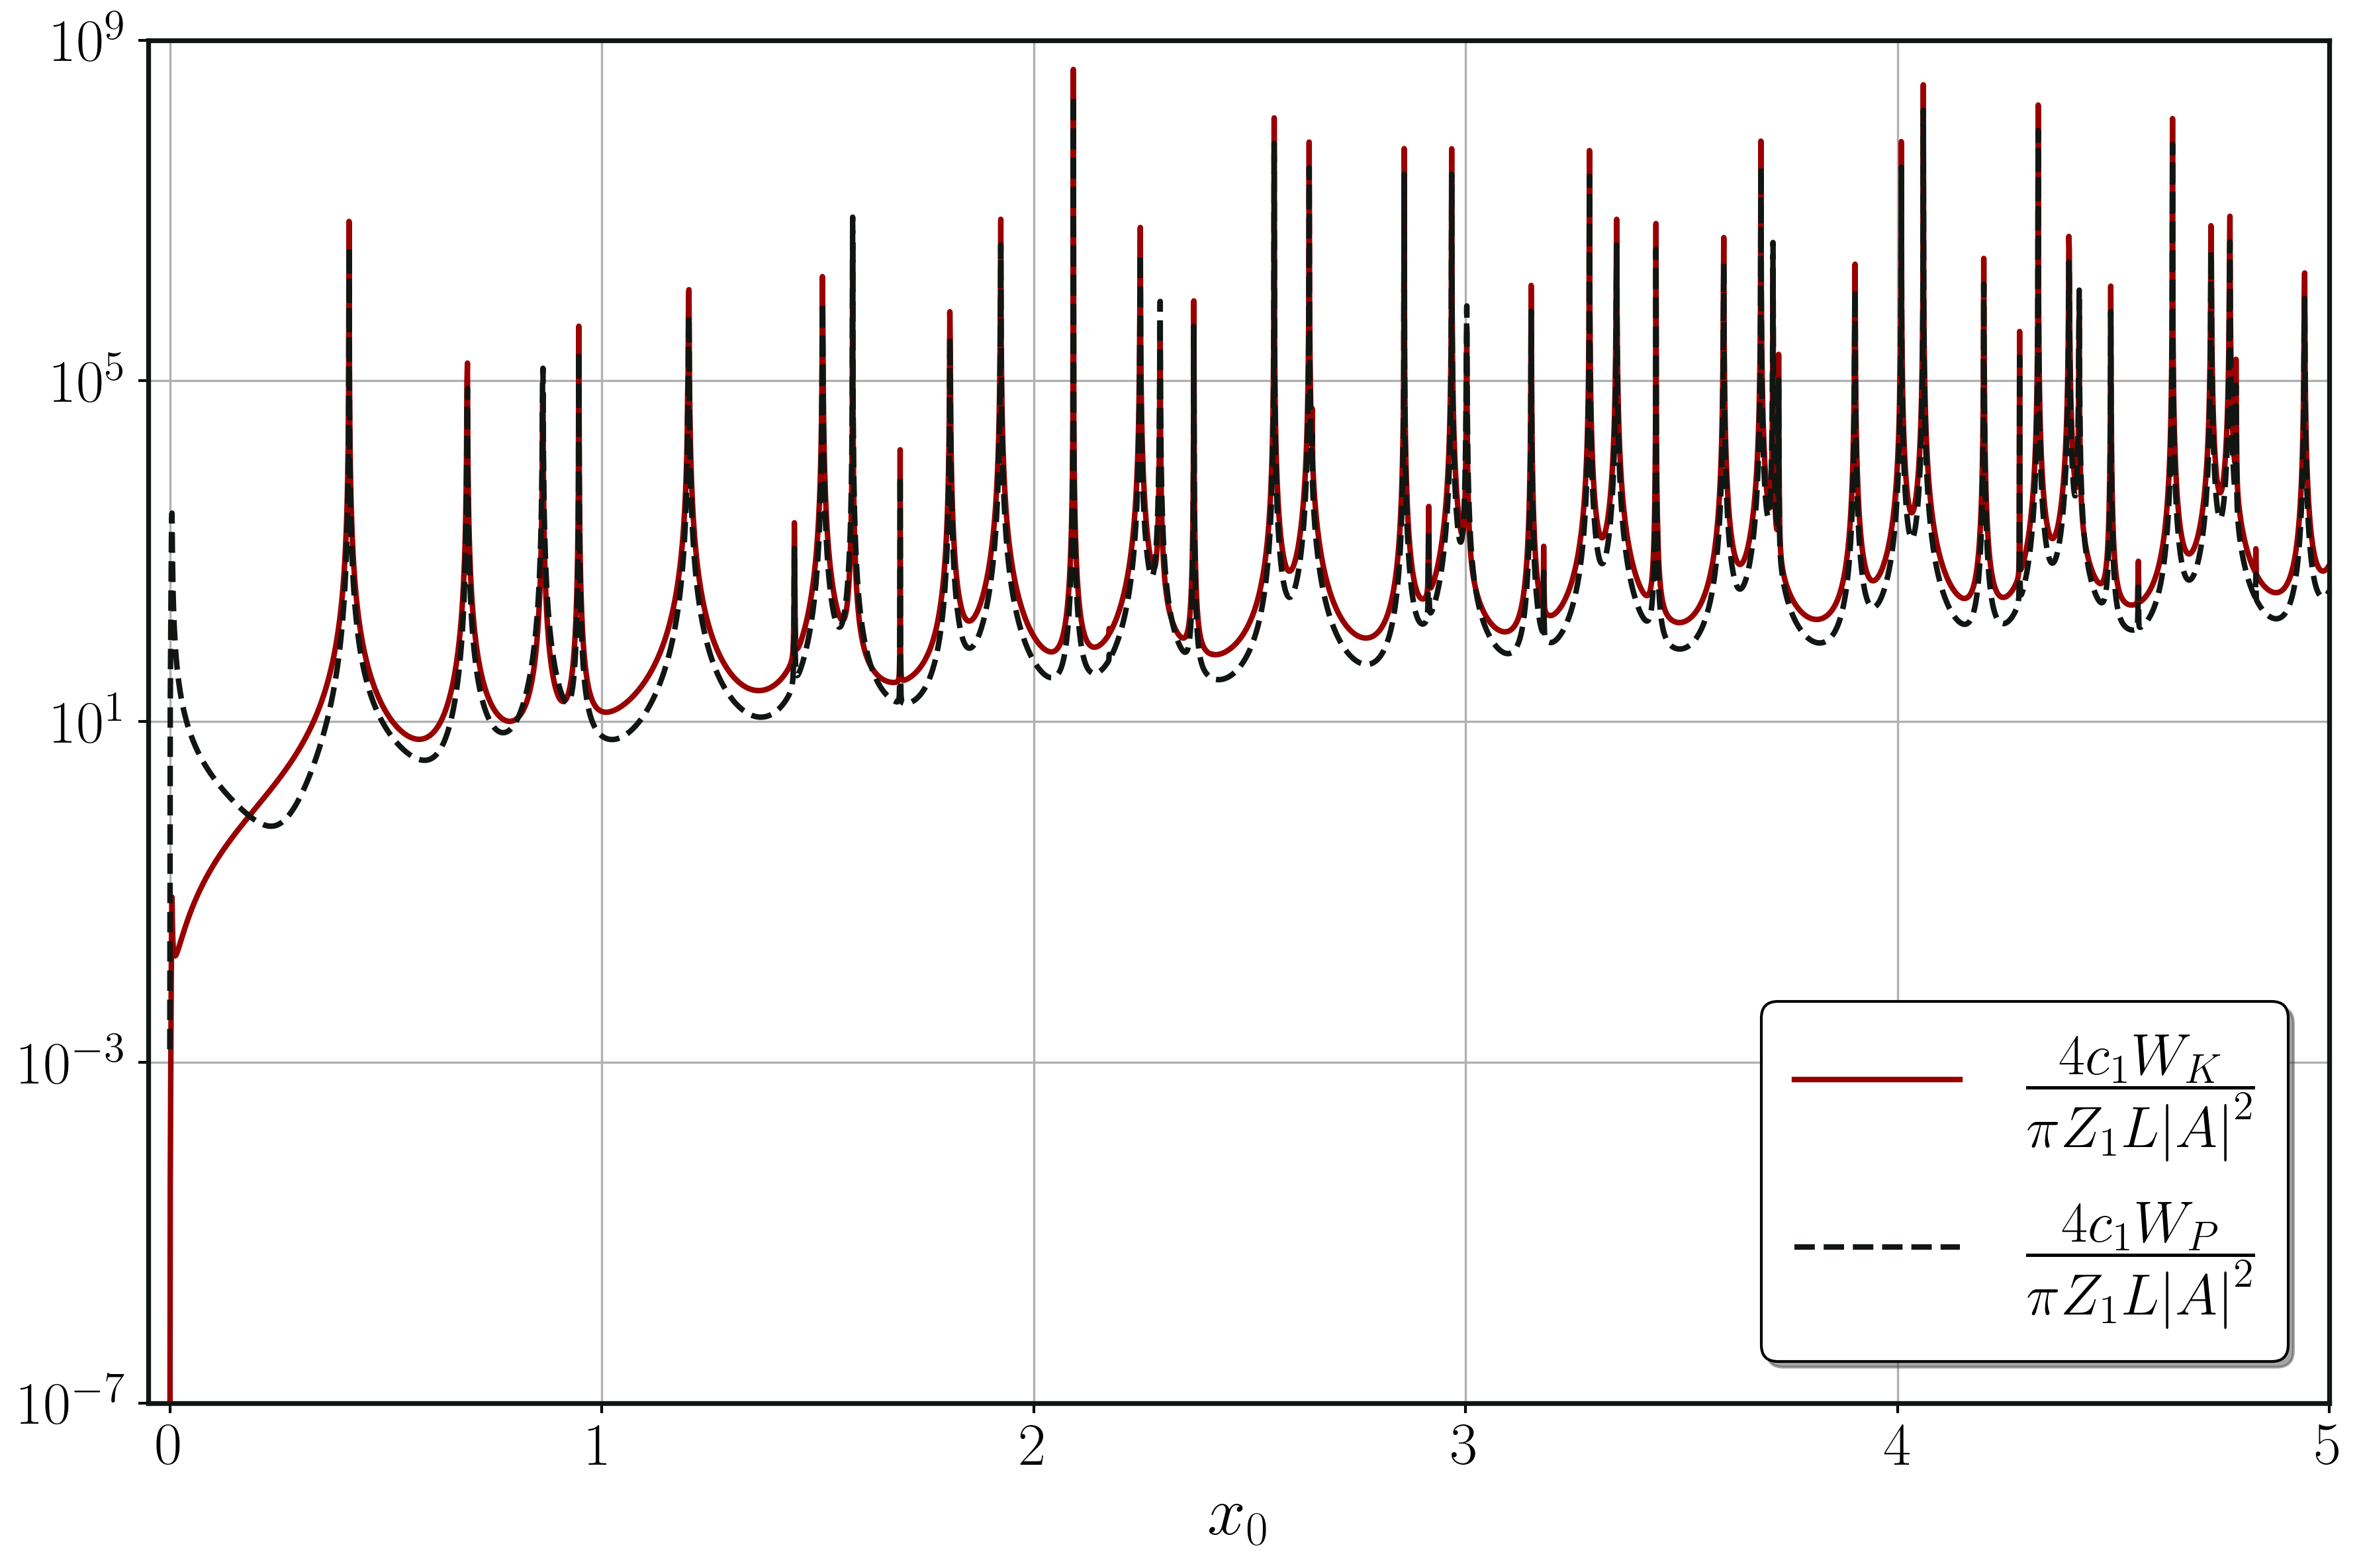

In [ ]:

# First plot
plt.figure(figsize=(12, 8))
plt.plot(x0_range, kinetic_energy, label=r'$\frac{4 c_1   W_K}{\pi Z_1 L\left|A \right|^2}$', linestyle='-', color='#990000', linewidth=2)
plt.plot(x0_range, potential_energy, label=r'$\frac{4 c_1   W_P}{\pi Z_1 L\left|A \right|^2}$', linestyle='--', color='#111612', linewidth=2)
plt.yscale("log")
plt.xlabel('$x_0$', fontsize=25)
plt.xlim(0, 0.1)
plt.ylim(1e-7, 1e9)
plt.legend(fontsize=30, framealpha=1, edgecolor='black', shadow=True, fancybox=True, loc='lower right')
plt.grid(True)
plt.gca().yaxis.set_major_locator(ticker.LogLocator(numticks=4))
# Customize axes appearance for first plot
for spine in plt.gca().spines.values():
    spine.set_color('#111612')
    spine.set_linewidth(1.75)
plt.tick_params(axis='x', width=1, labelsize=22)
plt.tick_params(axis='y', width=1, labelsize=22)

# Save and show first plot
plt.tight_layout()
plt.savefig('/content/drive/My Drive/wpwk_01_l_zero_cylinder.pdf', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wpwk_01_l_zero_cylinder.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wpwk_01_l_zero_cylinder.eps', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Second plot
plt.figure(figsize=(12, 8))
plt.plot(x0_range_low_precision, kinetic_energy_low_precision, label=r'$\frac{4 c_1   W_K}{\pi Z_1 L\left|A \right|^2}$', linestyle='-', color='#990000', linewidth=2)
plt.plot(x0_range_low_precision, potential_energy_low_precision, label=r'$\frac{4 c_1   W_P}{\pi Z_1 L\left|A \right|^2}$', linestyle='--', color='#111612', linewidth=2)
plt.yscale("log")
plt.xlabel('$x_0$', fontsize=25)
plt.xlim(-0.05, 5)
plt.ylim(1e-7, 1e9)
plt.legend(fontsize=30, framealpha=1, edgecolor='black', shadow=True, fancybox=True, loc='lower right')
plt.grid(True)
plt.gca().yaxis.set_major_locator(ticker.LogLocator(numticks=4))
# Customize axes appearance for second plot
for spine in plt.gca().spines.values():
    spine.set_color('#111612')
    spine.set_linewidth(1.75)
plt.tick_params(axis='x', width=1, labelsize=22)
plt.tick_params(axis='y', width=1, labelsize=22)

# Save and show second plot
plt.tight_layout()
plt.savefig('/content/drive/My Drive/wpwk_01_cylinder.pdf', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wpwk_01_cylinder.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('/content/drive/My Drive/wpwk_01_cylinder.eps', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()



